# Dataset - Iris

## Basics

In [25]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset from sklearn
iris = load_iris()

# Convert dataset into pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Map target values to target names
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Histogram

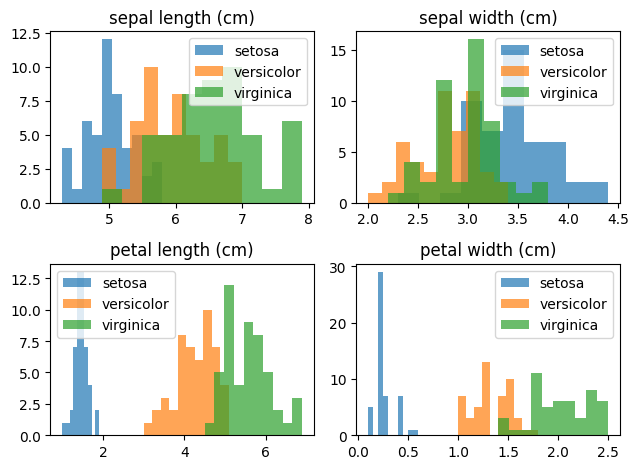

In [28]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2)

# Create histograms for each feature
features = iris.feature_names
for i, ax in enumerate(axs.flat):
    if i < len(features):
        for label in iris_df['target'].unique():
            ax.hist(iris_df[iris_df['target'] == label][features[i]], label=label, alpha=0.7)
            ax.set_title(features[i])
            ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Scatter

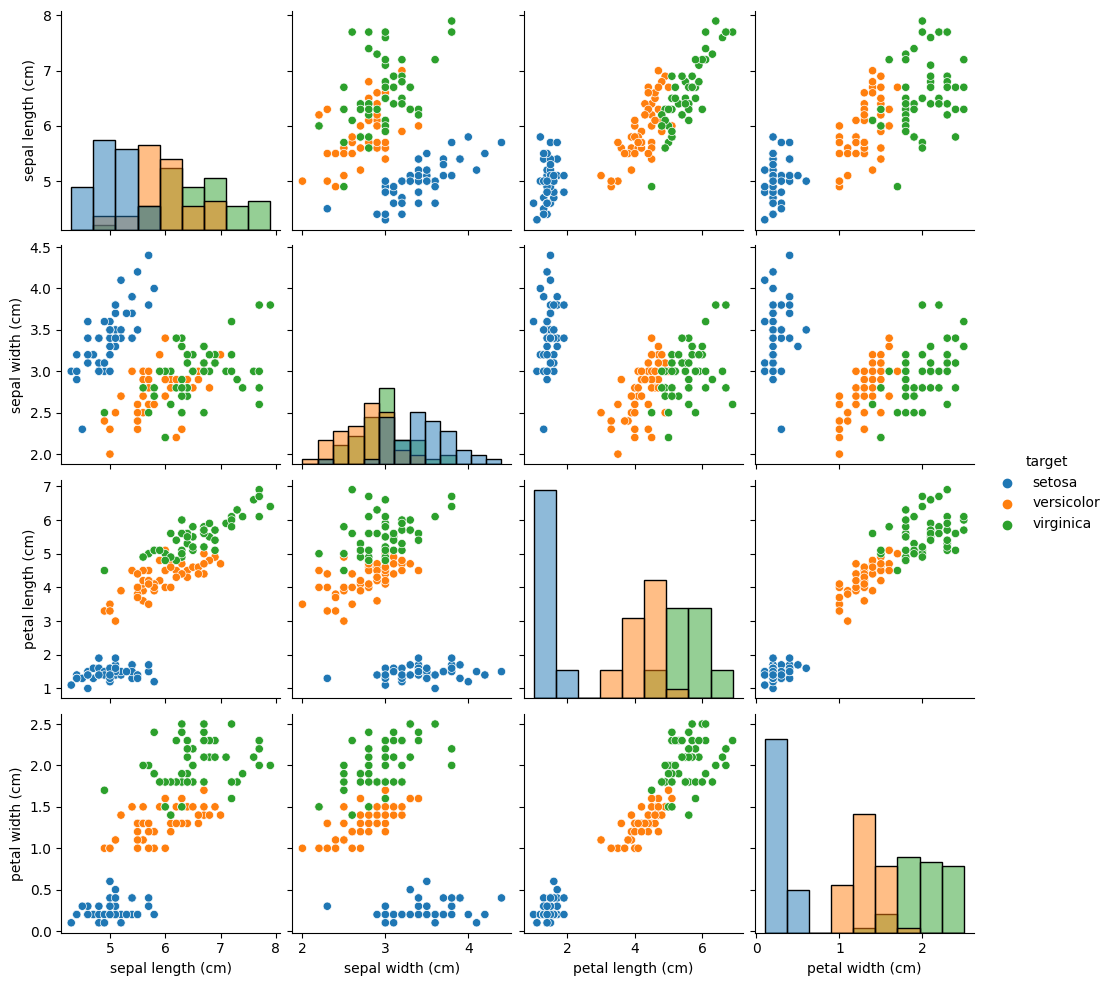

In [29]:
import seaborn as sns

# Create a pairplot (scatter plot matrix)
sns.pairplot(iris_df, hue='target', diag_kind='hist')

# Show the plot
plt.show()


## Distributions

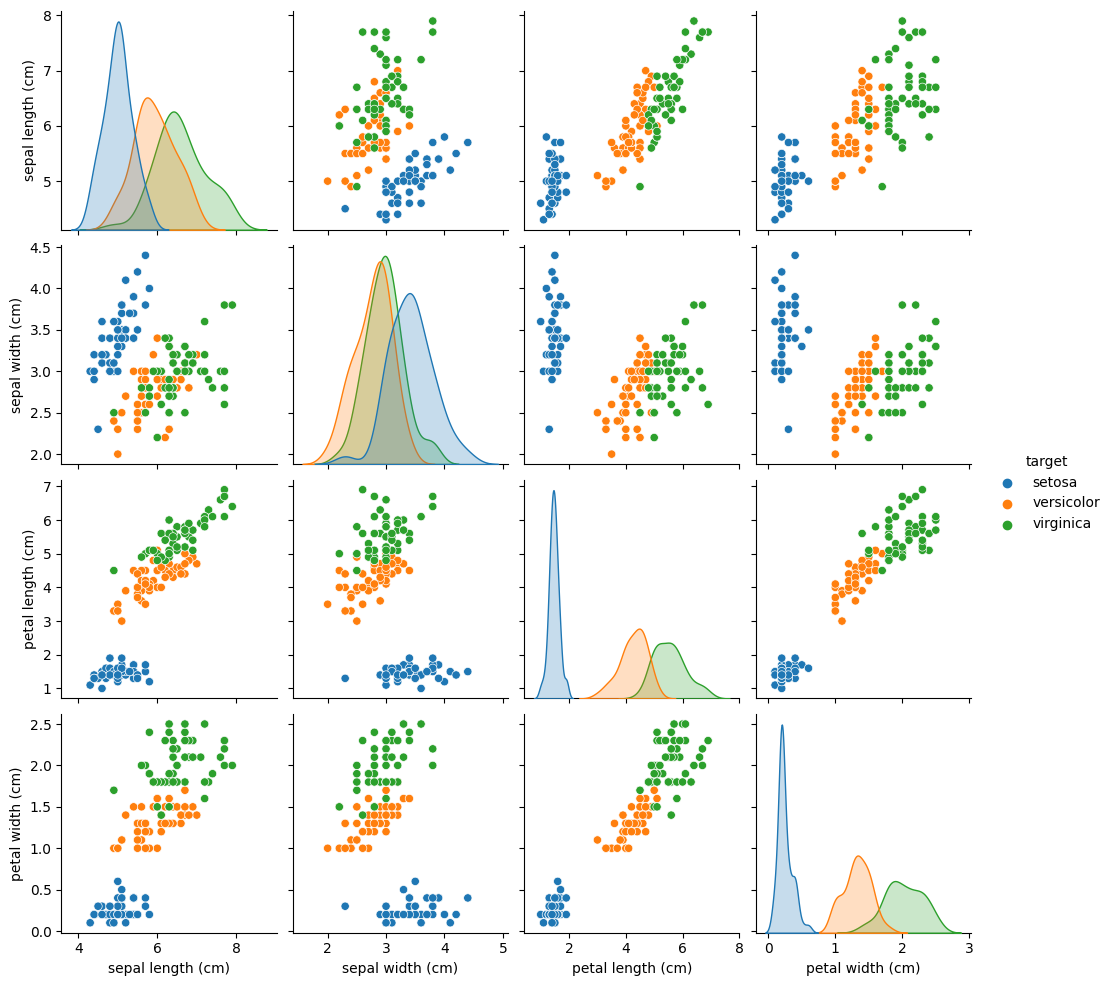

In [30]:
import seaborn as sns

# Pair plot of the iris dataset
sns.pairplot(iris_df, hue='target')


## Standardization and Normalization

Original Features
       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50

Standardized Features
       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           0.00         0.00         -0.00        -0.00
std            1.00         1.00          1.00         1.00
min           -1.87        -2.43         -1.57        -1.45
25%           -0.90        -0.59         -1.23        -1.18
50%           -0.05        -0.13          0.33         0.13

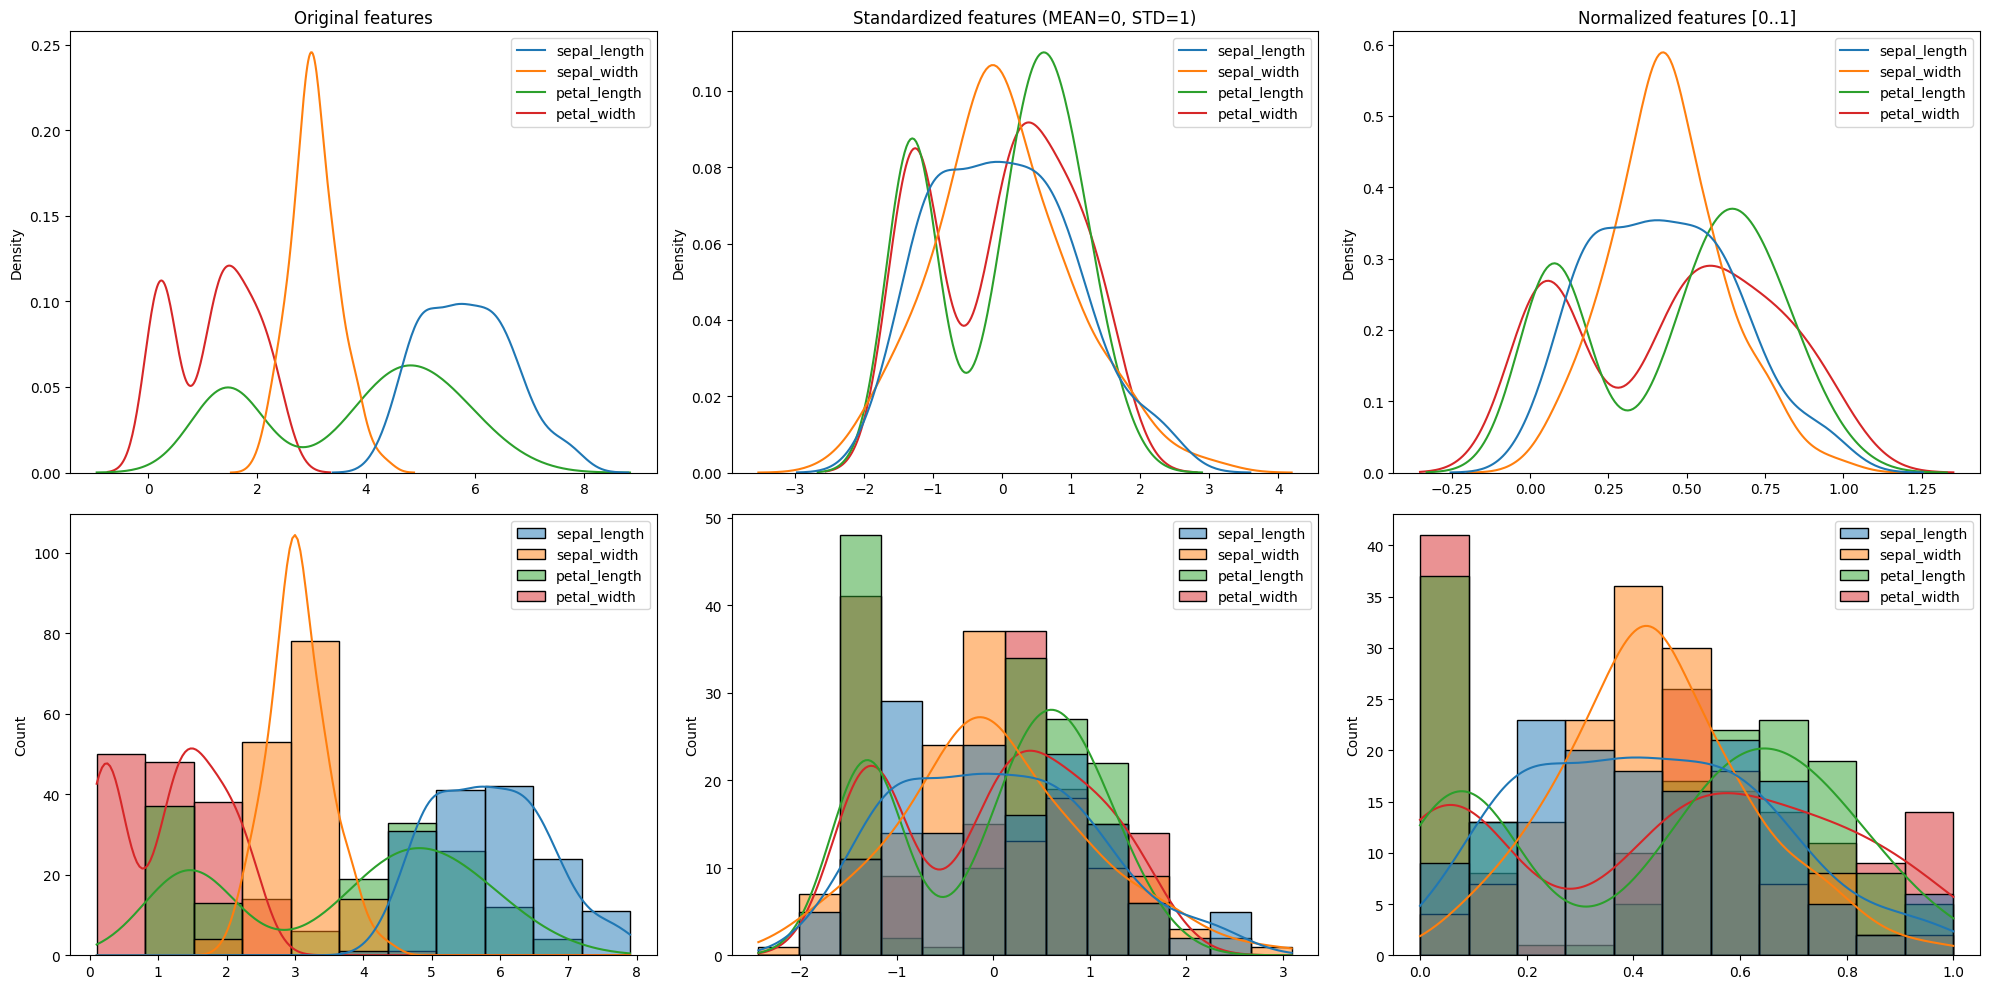

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Set pandas display options
pd.options.display.float_format = "{:.2f}".format

# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

# Separate features from the target
features = iris.drop('species', axis=1)
target = iris['species']

# Create scalers
scaler_std = StandardScaler()
scaler_norm = MinMaxScaler()

# Standardization and Normalization
std_features = pd.DataFrame(scaler_std.fit_transform(features), columns=features.columns)
norm_features = pd.DataFrame(scaler_norm.fit_transform(features), columns=features.columns)

# Round to two decimal places
std_features = std_features.round(2)
norm_features = norm_features.round(2)

# Print statistics
print("Original Features")
print(features.describe())
print("\nStandardized Features")
print(std_features.describe())
print("\nNormalized Features")
print(norm_features.describe())

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# KDE plots
# Original data plot
sns.kdeplot(data=features, ax=axs[0, 0])
axs[0, 0].set_title('Original features')

# Standardized data plot
sns.kdeplot(data=std_features, ax=axs[0, 1])
axs[0, 1].set_title('Standardized features (MEAN=0, STD=1)')

# Normalized data plot
sns.kdeplot(data=norm_features, ax=axs[0, 2])
axs[0, 2].set_title('Normalized features [0..1]')

# Histograms
# Original data histogram
sns.histplot(data=features, ax=axs[1, 0], kde=True)

# Standardized data histogram
sns.histplot(data=std_features, ax=axs[1, 1], kde=True)

# Normalized data histogram
sns.histplot(data=norm_features, ax=axs[1, 2], kde=True)

plt.tight_layout()
plt.show()
